In [2]:
import requests
import cv2
from glob import glob
import os
import torch
import torch.nn as nn
import ultralytics
import numpy as np
from ultralytics import YOLO

from ultralytics.nn.tasks import DetectionModel
from ultralytics.engine.model import Model

import matplotlib.pyplot as plt

from plotimages import yolo2bbox, plot_box, plot

In [3]:
ultralytics.checks()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
CUDA_VERSION = torch.version.cuda if DEVICE == "cuda" else "-"
print(f"Device: {DEVICE}. CUDA version: {CUDA_VERSION}.")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (24 CPUs, 125.6 GB RAM, 14.0/25.0 GB disk)
Device: cuda. CUDA version: 12.1.


In [4]:
!ls datasets/ambulance-dataset/images/train -1 | wc -l
!ls datasets/ambulance-dataset/labels/train -1 | wc -l
!ls datasets/ambulance-dataset/images/val -1 | wc -l
!ls datasets/ambulance-dataset/labels/val -1 | wc -l

6547
6547
308
308


['0']
['0']
['1']
['0', '0', '0']
['0']
['0']


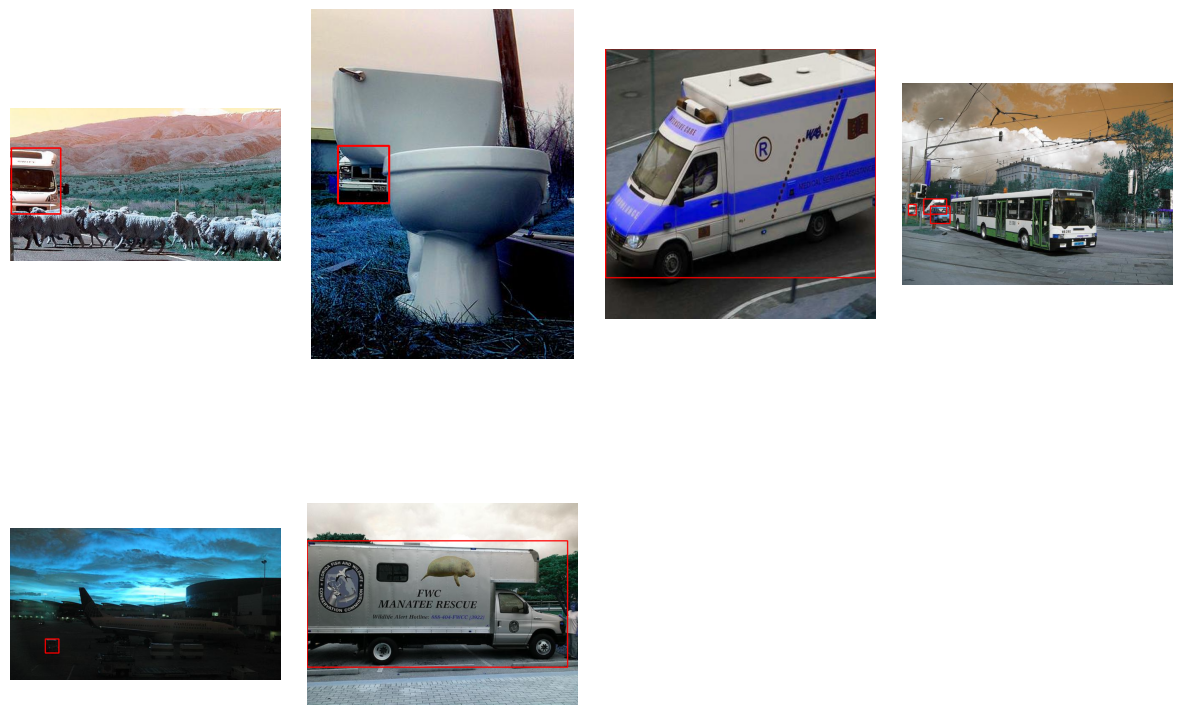

In [5]:
plot("datasets/ambulance-dataset/images/train", "datasets/ambulance-dataset/images/labels/train", 6)

In [15]:
yolo = YOLO(model="runs/detect/yolov8_truck_22/weights/last.pt")

In [16]:
# yolo.info(True)

In [17]:
results = yolo.train(
    data = "ambulance-dataset.yaml",
    imgsz = 320 * 3,
    epochs = 100,
    batch = 32,
    name = "yolov8_ambulance_2",
    freeze = 21,
    # resume=True,
    save = True,
    save_dir="YOLOv8/",
    lr0=0.005,
    lrf=0.01,
    optimizer="Adam",
    plots=True,
    workers=8,
)

New https://pypi.org/project/ultralytics/8.1.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8_truck_22/weights/last.pt, data=ambulance-dataset.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_ambulance_25, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=21, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

train: Scanning /root/yolo/datasets/ambulance-dataset/labels/train.cache... 6547 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6547/6547 [00:00<?, ?it/s]
val: Scanning /root/yolo/datasets/ambulance-dataset/labels/val.cache... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_ambulance_25/labels.jpg... 
optimizer: Adam(lr=0.005, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_ambulance_25
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.02G     0.9575      1.637      1.269         54        960: 100%|██████████| 205/205 [01:38<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.731      0.711      0.757      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.83G      0.964      1.109      1.262         54        960: 100%|██████████| 205/205 [01:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.709      0.762      0.775      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.12G     0.9822      1.105      1.285         45        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473       0.64      0.724       0.73      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.12G     0.9823      1.118      1.281         53        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.681      0.718      0.763      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.48G     0.9882      1.113      1.283         58        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.719       0.72      0.748      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.12G     0.9895      1.107       1.28         71        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.737      0.745       0.79      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.48G     0.9883      1.109      1.287         60        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.694      0.702      0.752      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.48G     0.9991      1.112      1.292         40        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.733      0.717      0.751      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.12G     0.9902      1.103      1.281         56        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.681      0.757      0.763       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.48G     0.9795      1.099      1.276         66        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        308        473      0.683      0.765      0.772      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.12G     0.9803      1.094      1.284         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.747       0.77      0.773      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.12G     0.9764      1.095      1.283         58        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.751      0.725      0.769      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.12G      0.974      1.084      1.275         59        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.693      0.745      0.755      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.12G     0.9859      1.098      1.283         67        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.754      0.739      0.778      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.12G     0.9678       1.08      1.273         63        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.736      0.737      0.747      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.12G     0.9656      1.079      1.276         46        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.735       0.74       0.79      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.12G     0.9805      1.089       1.28         65        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.768      0.671      0.769      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.77G     0.9747      1.078      1.277         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.758      0.741      0.786      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.48G     0.9789      1.077      1.276         53        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.776      0.714      0.778      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.13G     0.9765      1.071      1.284         68        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.783      0.754        0.8      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.12G     0.9772      1.066      1.276         69        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.764      0.729      0.783      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.12G      0.966      1.053      1.267         69        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.761      0.752      0.784      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.12G     0.9783       1.07      1.276         62        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.711       0.73      0.767      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.77G     0.9651      1.056      1.269         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.772      0.726      0.772      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.48G     0.9636      1.046      1.267         64        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.719      0.741      0.778      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.48G     0.9717      1.047      1.272         53        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.832      0.687      0.775      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.47G     0.9546      1.047      1.257         55        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.769      0.739      0.768      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.48G     0.9645      1.052      1.269         63        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.707      0.787      0.768      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.48G     0.9601       1.05      1.262         59        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.747      0.731       0.79      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.12G     0.9566      1.036      1.259         48        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.754      0.771      0.791      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.48G     0.9478      1.031      1.256         45        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.698      0.799      0.789      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.12G     0.9482      1.034      1.259         77        960: 100%|██████████| 205/205 [01:36<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.719      0.789      0.785      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.48G     0.9536      1.035      1.259         55        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.729      0.762      0.778      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.13G     0.9613      1.047       1.27         50        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.752      0.767      0.752      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.48G     0.9551       1.04      1.268         74        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.757      0.764       0.78      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.48G     0.9554      1.046      1.259         58        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.747      0.764      0.781      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.12G     0.9431      1.026      1.249         54        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.756      0.717      0.777      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.12G     0.9493      1.036      1.257         63        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.771      0.748       0.79      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.12G     0.9551      1.033      1.258         59        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.763      0.761      0.789      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.06G     0.9448      1.016      1.253         52        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.748      0.737      0.767       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.12G     0.9455      1.018       1.25         59        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473        0.8      0.749       0.79      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.48G      0.943      1.016      1.252         55        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.738      0.748      0.787      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.48G     0.9415      1.022      1.248         56        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        308        473      0.771      0.717      0.777      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.12G     0.9373       1.01      1.246         63        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        308        473      0.771      0.746      0.793       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.12G     0.9359      1.013      1.248         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.749      0.752      0.769      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.77G     0.9446      1.017      1.251         53        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.748      0.741      0.793      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.12G     0.9317      1.002      1.248         45        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.805      0.749      0.785      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.12G     0.9372      1.007      1.245         62        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.761      0.764      0.775      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.12G     0.9343      1.004      1.241         50        960: 100%|██████████| 205/205 [01:36<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.734       0.76      0.777      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.48G     0.9285       1.01      1.243         58        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.777      0.717      0.767       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.12G     0.9286     0.9957      1.242         73        960: 100%|██████████| 205/205 [01:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.742      0.781      0.794      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.12G     0.9418      1.014      1.246         52        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.796      0.755      0.786      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.13G     0.9389      1.012      1.245         43        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.757      0.772      0.784      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.12G     0.9245      0.986       1.24         55        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.788       0.76      0.784      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.12G     0.9262     0.9947      1.239         54        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.733      0.768      0.791      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.48G     0.9316     0.9923      1.242         79        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.753       0.77      0.786      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.12G     0.9246     0.9931      1.237         60        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.764      0.773      0.779      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.12G     0.9291     0.9885      1.237         51        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.745      0.755      0.769      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.12G     0.9213     0.9912      1.241         76        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473       0.76      0.742       0.78      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.12G      0.925     0.9875      1.238         63        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.789      0.755      0.795      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.48G     0.9212     0.9795      1.231         53        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473       0.77       0.75      0.774      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.48G     0.9194     0.9757      1.233         40        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.748      0.773       0.79      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.48G     0.9156     0.9689       1.23         61        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.776      0.769      0.797      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.12G     0.9147      0.971      1.224         53        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.762      0.775      0.785      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.83G     0.9159     0.9873      1.229         55        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473       0.77      0.769       0.77      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.12G      0.908     0.9592      1.227         51        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.784      0.766      0.799      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.12G     0.9088     0.9636       1.23         58        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.797      0.761      0.802      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.12G     0.9074     0.9636      1.227         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.774      0.774      0.793      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.12G      0.911     0.9659      1.226         55        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.751      0.791      0.777      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.12G     0.9096     0.9663       1.23         55        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.761       0.76      0.775      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.12G     0.9125      0.962      1.224         55        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.757       0.76      0.786      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.48G     0.9141     0.9643      1.225         54        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.759      0.771      0.784      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.12G     0.9015     0.9491      1.218         62        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.798      0.731      0.791      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.13G     0.9014     0.9618      1.221         65        960: 100%|██████████| 205/205 [01:36<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.787       0.76      0.795      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.12G     0.8906     0.9456      1.213         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.769      0.786        0.8      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.48G     0.8961     0.9377      1.218         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.787      0.774      0.793      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.48G     0.8903     0.9417      1.216         57        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.744      0.786      0.794      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.12G      0.899     0.9443      1.218         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.778      0.778      0.794       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.48G     0.9006     0.9468      1.217         72        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.781      0.786      0.789      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.48G     0.8966     0.9447      1.213         60        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473       0.74      0.787      0.787      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.83G     0.8989     0.9417      1.217         53        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.765      0.772       0.79      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.48G     0.8905     0.9267      1.209         45        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473       0.77      0.775       0.79      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.12G     0.8808      0.933      1.201         58        960: 100%|██████████| 205/205 [01:36<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.756      0.785      0.793      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.12G     0.8914     0.9309      1.212         53        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.794      0.764      0.796      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.12G     0.8901      0.925      1.219         59        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.783      0.763      0.796      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.48G     0.8751     0.9194      1.195         41        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.719      0.798      0.794      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.48G       0.89     0.9258       1.21         50        960: 100%|██████████| 205/205 [01:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        308        473      0.791      0.764      0.801      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.12G     0.8822     0.9162      1.207         49        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.787      0.763      0.801      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.48G     0.8814     0.9273      1.204         64        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        308        473      0.792      0.768        0.8      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.12G     0.8847     0.9192      1.207         54        960: 100%|██████████| 205/205 [01:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.796      0.763        0.8      0.583


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.48G     0.9458     0.9691      1.247         35        960: 100%|██████████| 205/205 [01:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        308        473      0.779      0.744      0.798       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.48G     0.9322     0.9498      1.238         25        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473       0.76      0.758      0.797      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.12G     0.9173     0.9365      1.224         26        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.786      0.756      0.799      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.12G     0.9239     0.9281      1.231         26        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.744      0.781        0.8      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.12G     0.9186     0.9313      1.227         35        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.751      0.773      0.797      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.12G      0.909     0.9203      1.223         26        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473      0.747      0.775      0.793       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.12G     0.9079     0.9154      1.223         32        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all        308        473      0.748      0.762       0.79      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.48G     0.9082     0.9092      1.218         20        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        308        473       0.77      0.756      0.791       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.12G     0.9058     0.9211      1.216         29        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        308        473      0.764      0.755      0.789       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.48G     0.8999      0.905      1.216         27        960: 100%|██████████| 205/205 [01:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        308        473      0.748      0.769      0.795      0.561



100 epochs completed in 2.772 hours.
Optimizer stripped from runs/detect/yolov8_ambulance_25/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/yolov8_ambulance_25/weights/best.pt, 52.1MB

Validating runs/detect/yolov8_ambulance_25/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all        308        473      0.797      0.761        0.8      0.587
                 truck        308        414      0.739      0.527      0.646      0.442
             ambulance        308         59      0.854      0.995      0.955      0.731
Speed: 0.2ms preprocess, 8.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8_ambulance_25


In [ ]:
start = np.random.randint(0, 240)
results = yolo(glob("datasets/truck-dataset/images/val/*.jpg")[start:start+10])

In [ ]:
savefolder = "runs/detect/results1/"
for i in range(10):
    filename = f"result_{i}.jpg"
    results[i].save(f"{savefolder}{filename}")

In [ ]:
yolo2 = YOLO(model="yolov8m.pt")

In [ ]:
yolo2.val(data="coco.yaml", plots=True)